In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import config
import matplotlib.dates as dates
import sklearn.linear_model as linear_model
plt.rcParams.update({'font.size': 18})


In [17]:

def import_catalog(file):
    df = pd.read_csv(file)
    df.sort_values(by='first_arrival', inplace=True)
    df['arrival_datetime'] = df.arrival_time.apply(dates.num2date)
    return df
    
# also need to remove a number of columns that are simply irrelevant to the analysis or untested for a shareable dataset.

df141 = import_catalog(file='141precision.csv')
df188 = import_catalog(file='188precision.csv')
df197 = import_catalog(file='197precision.csv')
df211 = import_catalog(file='211precision.csv')


columns_to_keep = ['id', 'depth', 'relative_depth',
        'first_hydrophone', 'second_hydrophone',
       'arrival_time', 'first_arrival', 'second_arrival', 'dt',
       'max_amp', 'cum_amp', 'arrival_datetime', 'origin_time']

df141 = df141[columns_to_keep].copy()
df188 = df188[columns_to_keep].copy()
df197 = df197[columns_to_keep].copy()
df211 = df211[columns_to_keep].copy()

df141.sort_values(by='arrival_datetime', inplace=True)
df188.sort_values(by='arrival_datetime', inplace=True)
df197.sort_values(by='arrival_datetime', inplace=True)
df211.sort_values(by='arrival_datetime', inplace=True)

# # removing the events with maximum amplitude <0.1 since they are false positives
df141 = df141[df141.max_amp > 0.5].copy()
df188 = df188[df188.max_amp > 0.5].copy()
df197 = df197[df197.max_amp > 0.5].copy()
df211 = df211[df211.max_amp > 0.5].copy()

df141.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df188.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df197.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df211.drop_duplicates(subset=['arrival_datetime',], inplace=True)

df141 = df141[df141.depth > 160].copy()
df188 = df188[df188.depth > 160].copy()
df197 = df197[df197.depth > 160].copy()
df211 = df211[df211.depth > 160].copy()

df141['origin_time'] = pd.to_datetime(df141['origin_time'])
df188['origin_time'] = pd.to_datetime(df188['origin_time'])
df197['origin_time'] = pd.to_datetime(df197['origin_time'])
df211['origin_time'] = pd.to_datetime(df211['origin_time'])

columns_to_keep = ['depth', 'first_hydrophone',
       'second_hydrophone', 'origin_time']

df141 = df141[columns_to_keep]
df188 = df188[columns_to_keep]
df197 = df197[columns_to_keep]
df211 = df211[columns_to_keep]

# Calculates the difference of a DataFrame element compared with another element in the DataFrame (default is element in previous row).
df141['dz'] = df141['depth'].diff()
df188['dz'] = df188['depth'].diff()
df197['dz'] = df197['depth'].diff()
df211['dz'] = df211['depth'].diff()

df141['dt'] = df141.origin_time.diff().apply(lambda t: t.total_seconds())
df188['dt'] = df188.origin_time.diff().apply(lambda t: t.total_seconds())
df197['dt'] = df197.origin_time.diff().apply(lambda t: t.total_seconds())
df211['dt'] = df211.origin_time.diff().apply(lambda t: t.total_seconds())

<Axes: >

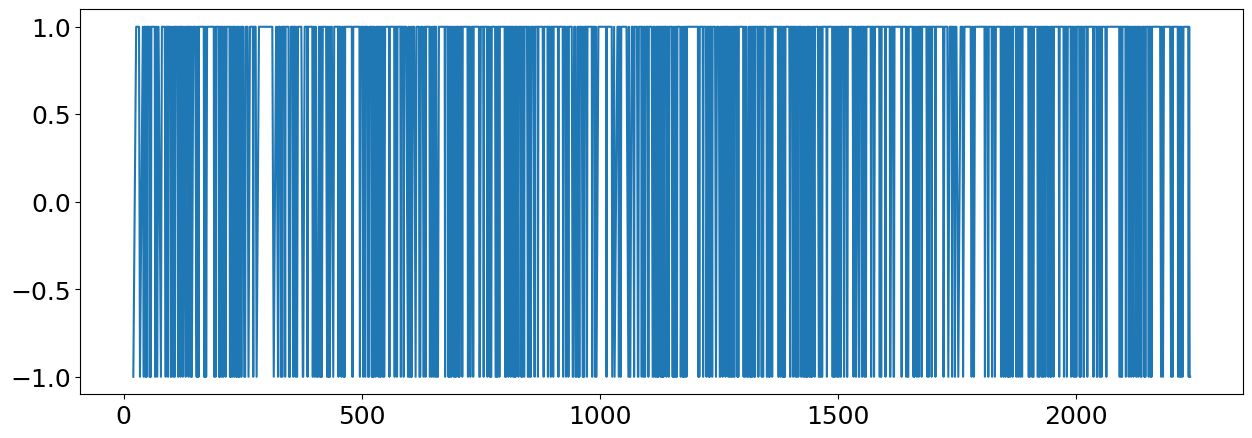

In [25]:
def sign(number):
    if number >= 0:
        return 1
    else:
        return -1

df141.dz.apply(sign).plot(figsize=(15,5))